# Subnetwork detection problem

This notebook explains how the SD test problem was created and what it consists of.

**Objective.** Given a graph $G(V,E)$ the objectiveFunction of the problem is to find the subgraph $S(V', E')$ that maximizes the average of the values of the connections between the nodes that compose the subgraph $S$.

**Description**. This is a combinatorial problem in which we want to find a path of size $k$ of non-repeating groupings regardless of the order. In turn, the problem is subject to the constraint of the structure of the network $G$.

If a fully connected graph is considered the complexity of the search space is given by

$$ {{n}\choose{k}} = \frac{n!}{k! \cdot (n - k)!}$$

If the graph is not fully connected the number of possible valid groupings (i.e., subgraphs in which no node is disconnected) is less than the number of possible combinations given by the aforementioned expression.

Ant-based optimization algorithms are well suited to deal with this type of problem since their search space operates directly on the set of valid solutions, considerably reducing the possible number of combinations in graphs that are not completely connected. 

To test the applicability of the ant optimization algorithms developed in this framework, a graph $G(V, E)$ composed of $V$ nodes and $E$ connections, not necessarily densely connected, has been considered. The connections of this network were initially weighted by random values given by a uniform distribution with values between 0.3 and 0.5.

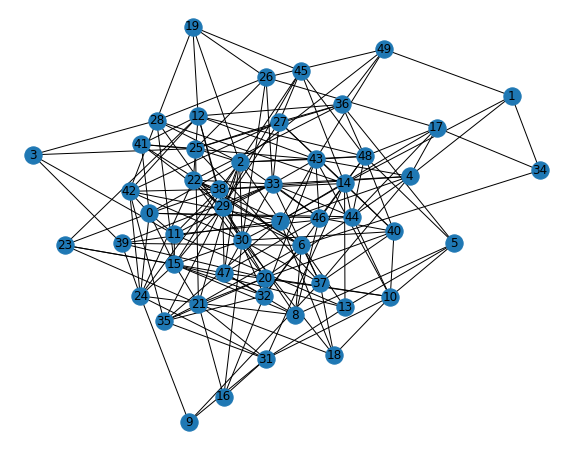

In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

seed = 1997
nodes = 50
edges = 200

np.random.seed(seed)
random.seed(seed)

# Generate a random graph
graph = nx.dense_gnm_random_graph(n=nodes, m=edges, seed=seed)
adj_matrix = np.array(nx.adjacency_matrix(graph).todense(), dtype=np.int8)

fig, ax = plt.subplots(figsize=(10, 8))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
nx.draw_networkx(graph, ax=ax)
plt.show()

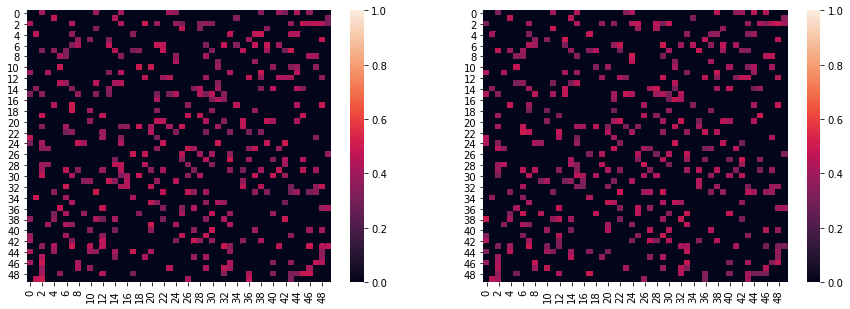

In [2]:
np.random.seed(seed)
random.seed(seed)

# Generate group values
Gmax = np.multiply(np.random.uniform(low=0.3, high=0.5, size=adj_matrix.shape), adj_matrix)
Gmin = np.multiply(np.random.uniform(low=0.3, high=0.5, size=adj_matrix.shape), adj_matrix)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(Gmax, ax=axes[0], vmin=0.0, vmax=1.0)
sns.heatmap(Gmin, ax=axes[1], vmin=0.0, vmax=1.0)
plt.show()

The objectiveFunction of the optimization is to determine the sub-graph that maximizes the average difference between the values of each of the groups according to the cost function:

$$ S^* = \underset{S}{argmax}\;\frac{1}{len(edges(S))} \sum_{node}^{S} sum(edges(S, node)) $$

Where the values of the connections of the graph to be explored are determined by the difference of the values belonging to a group denoted as $G_{max}$ and another group denoted as $G_{min}$. In this way the optimization will give us the subnetwork that has the highest average of connections in $G_{max}$ and the lowest in $G_{min}$.

Optimal solution: [3, 4, 24, 31, 33, 42, 44, 45]


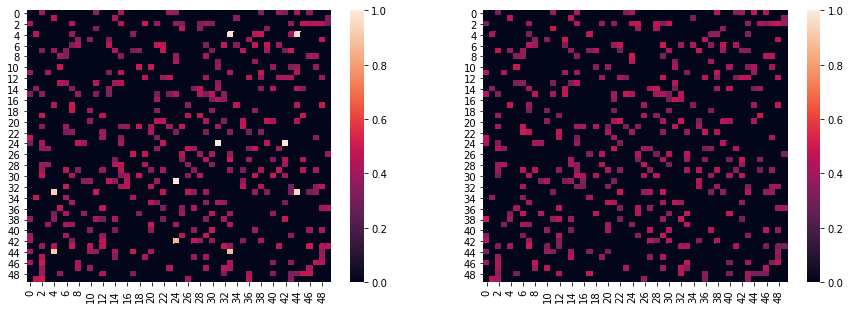

In [3]:
np.random.seed(seed)
random.seed(seed)

# Create a known subgraph that maximizes the differences between the two groups
optimal_path_length = 8
selected_nodes = np.random.choice([n for n in range(nodes)], size=optimal_path_length, replace=False)
subgraph = np.zeros(shape=adj_matrix.shape, dtype=np.int8)
subgraph[tuple(np.meshgrid(selected_nodes, selected_nodes))] = 1
subgraph = np.multiply(subgraph, adj_matrix).astype(np.int8)
variation = np.multiply(np.random.uniform(low=0.4, high=0.6, size=adj_matrix.shape), subgraph)
Gmax += variation
Gmin -= variation

print('Optimal solution: %r' % sorted(selected_nodes.tolist()))

# Plot the new values associated with each group
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(Gmax, ax=axes[0], vmin=0.0, vmax=1.0)
sns.heatmap(Gmin, ax=axes[1], vmin=0.0, vmax=1.0)
plt.show()

To increase the difficulty of the problem it is possible to add other subgraphs that show differences between the two groups but without being as high as the subgraph generated in the previous step that corresponds to the known optimal solution.

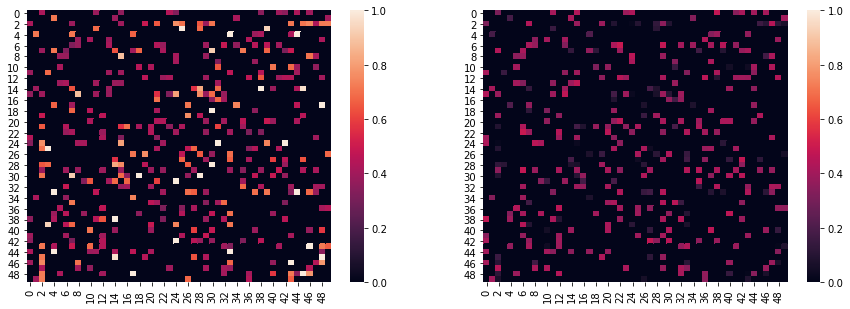

In [4]:
np.random.seed(seed)
random.seed(seed)

num_subnetworks = 10
min_nodes = 5
max_nodes = 15

# Add noise
for _ in range(num_subnetworks):
    noise_nodes = np.random.choice(
        [n for n in range(nodes)], size=random.randint(min_nodes, max_nodes), replace=False)
    random_subnetwork = np.zeros(shape=adj_matrix.shape, dtype=np.int8)
    random_subnetwork[tuple(np.meshgrid(noise_nodes, noise_nodes))] = 1
    random_subnetwork = np.multiply(random_subnetwork, adj_matrix).astype(np.int8)
    variation = np.multiply(
        np.random.uniform(low=0.2, high=0.39, size=adj_matrix.shape), random_subnetwork)
    Gmax += variation
    Gmin -= variation
    
# Generate symmetric matrices
Gmax = (Gmax + Gmax.T) / 2
Gmin = (Gmin + Gmin.T) / 2

# Plot the new values associated with each group
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(Gmax, ax=axes[0], vmin=0.0, vmax=1.0)
sns.heatmap(Gmin, ax=axes[1], vmin=0.0, vmax=1.0)
plt.show()

In this way, the optimization will be carried out on the differences between $G_{max}$ and $G_{min}$.

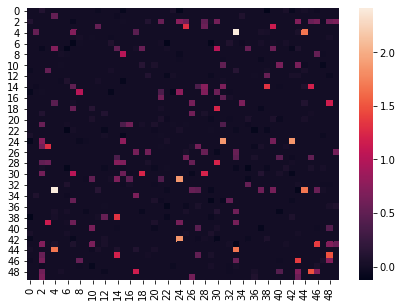

In [5]:
diff = Gmax - Gmin

# Plot the new values associated with each group
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(diff, ax=ax, vmin=np.min(diff), vmax=np.max(diff))
plt.show()